# GTZAN Dataset - Music Genre Classification

In this notebook we import and explore the data to identify its feature, what they mean and how they relate to our response variable.

## 1. Importing Libraries

In [91]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display as lplt
from pathlib import Path
import sklearn.model_selection as skms
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers




## 2. Loading Dataset

In [93]:
df = pd.read_csv(r'Data\features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [94]:
print(f'This dataset has the shape {df.shape}.')

This dataset has the shape (9990, 60).


In [95]:
music_genres = df.label.unique()
music_genres = [i.title() for i in music_genres]
print(f'The genres presented in the data are:')
for genre in music_genres:
    print(genre)

The genres presented in the data are:
Blues
Classical
Country
Disco
Hiphop
Jazz
Metal
Pop
Reggae
Rock


## 3. Data Visualization

Loading the path of sample songs for each genre.

In [96]:
songs = {}
for genre in music_genres:
    sample_path = Path(f'Data/genres_original/{genre}/{genre}.00000.wav')
    data, sr = librosa.load(sample_path, sr=45600)
    songs[genre] = data

The main features of audio can be categories as follows:

- Time domain features

- Frequency domain features

- Time-Frequancy domain features

### 3.1 Spectrograms

A spectrogram is a visual representation of a signal's signal strength (or "loudness") across time at various frequencies included in a waveform. Colors represent a third dimension in spectrograms, which are essentially two-dimensional graphs. Along the horizontal axis, time passes from left to right (oldest to youngest). Furthermore, the vertical axis shows frequency (also known as pitch or tone), with the lowest frequencies at the bottom and the highest frequencies at the top. The third dimension, color, represents the amplitude (or energy or "loudness") of a certain frequency at a given moment, with dark blues corresponding to low amplitudes and brighter hues up through red corresponding to progressively stronger (or louder) amplitudes.

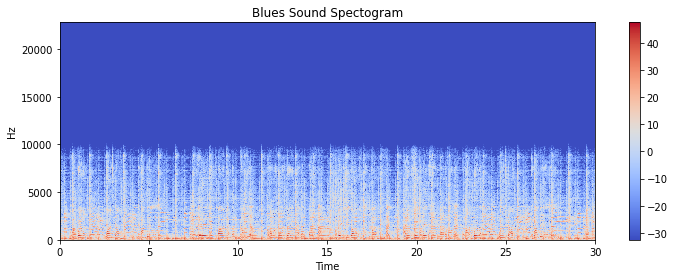

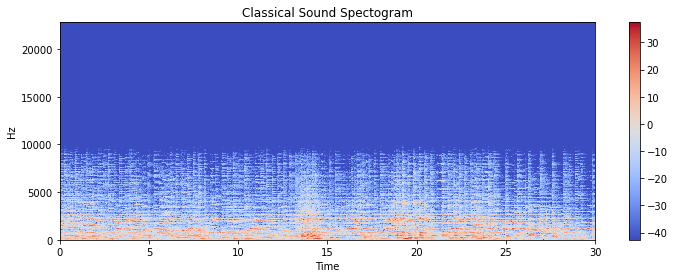

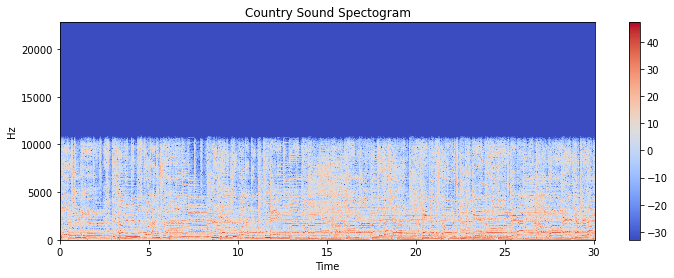

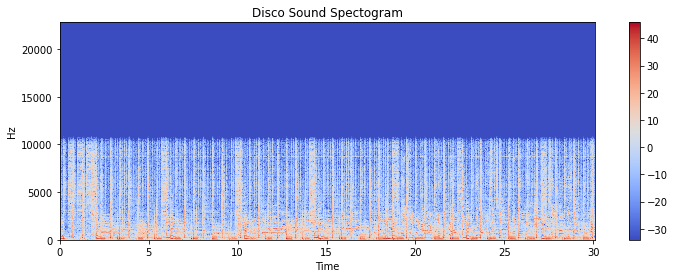

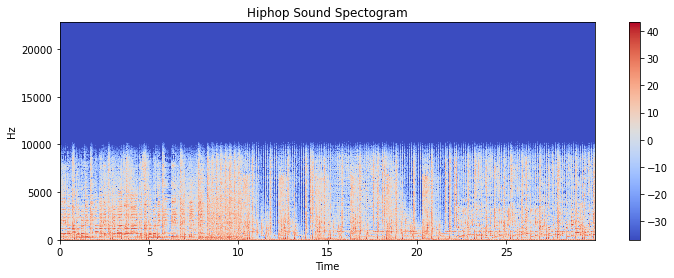

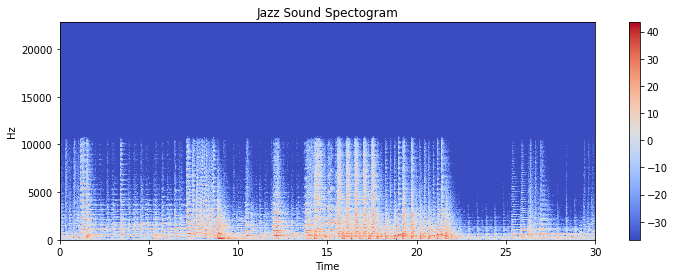

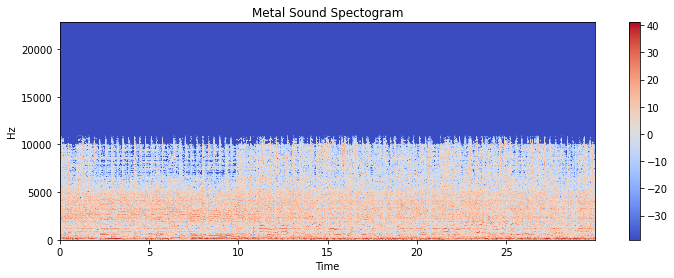

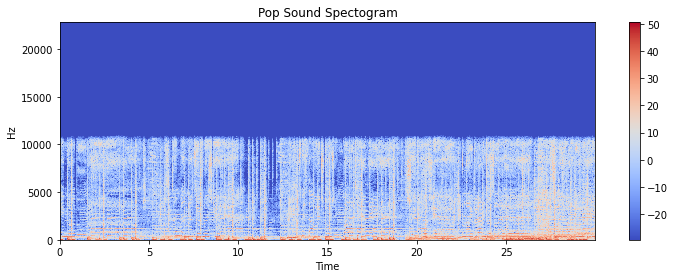

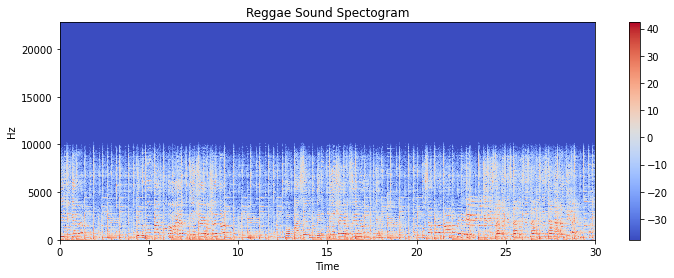

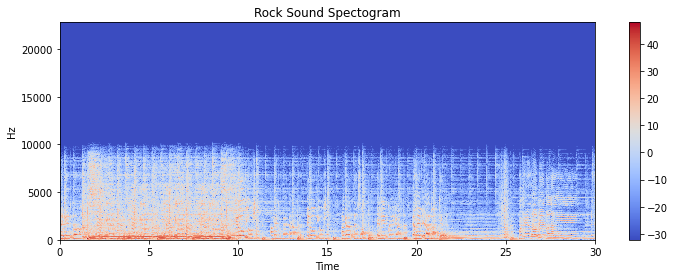

In [97]:
for genre, tracks in songs.items():
    X = librosa.stft(tracks) #stft -> Short-time Fourier transform
    X_db=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
    plt.figure(figsize=(12,4))
    librosa.display.specshow(X_db, sr=sr,x_axis="time",y_axis="hz")
    plt.title(genre + " Sound Spectogram")
    plt.colorbar()

### 3.2 Mel-Frequency Cepstral Coefficients (MFCC)

The mel-frequency cepstrum (MFC) is a representation of a sound's short-term power spectrum based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency used in sound processing. The MFCCs (mel-frequency cepstral coefficients) are the coefficients that make up an MFC (*1st reference here*). They are derived from a nonlinear "spectrum-of-a-spectrum" cepstral representation of the audio sample.

Mel Frequency Cepstral Coefficients (MFCC) are a prominent feature extractor used in audio processing and are widely utilized to extract vital information from a voice signal.

C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2674)
(20, 2674)


C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.2260893  -0.26495975 -0.24018662 ... -0.11315639 -0.06581084
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2680)
(20, 2683)


C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.16259822 -0.1300141  -0.03473616 ... -0.01871183 -0.01749785
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.00900574 -0.01148018 -0.01201465 ...  0.00626728  0.00532277
  0.00275065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2672)
(20, 2674)


C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.11466005 -0.10642795 -0.06088607 ... -0.03782257 -0.00870064
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.08693509 -0.1038393  -0.09761104 ...  0.01883913  0.0166648
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2672)
(20, 2672)


C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[ 0.01008807  0.00921476  0.00790629 ... -0.04551869 -0.03387891
 -0.01599133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\952027412.py:2: FutureWarning: Pass y=[-0.03322262 -0.0488135  -0.05501743 ...  0.11454812  0.12427278
  0.06935693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2674)
(20, 2674)


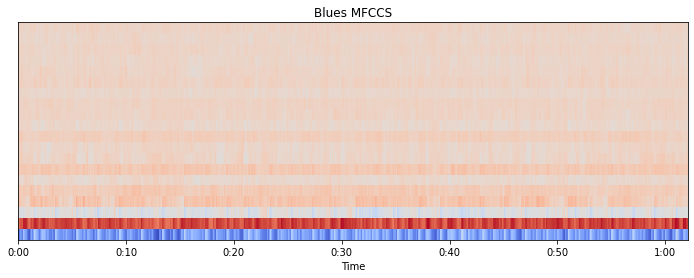

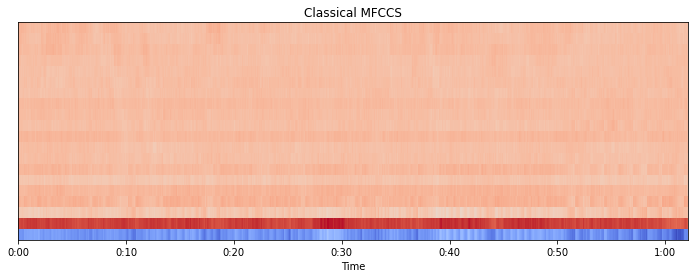

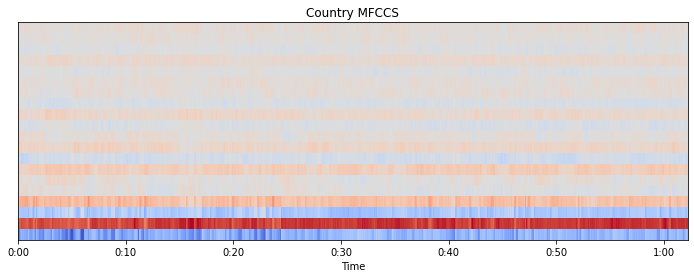

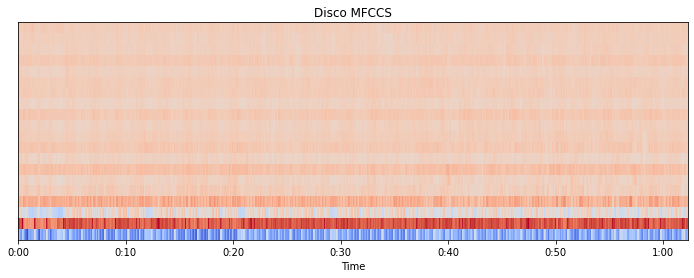

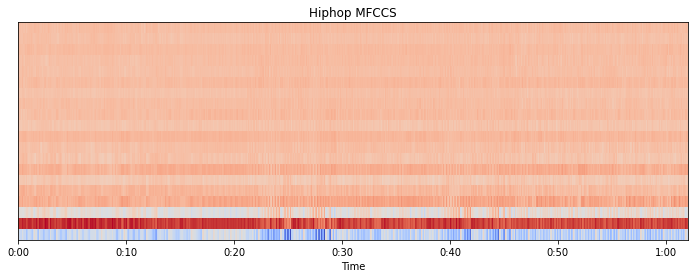

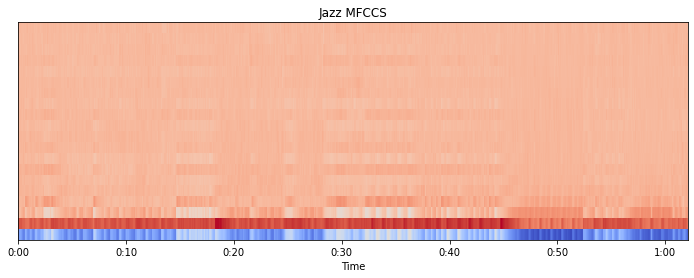

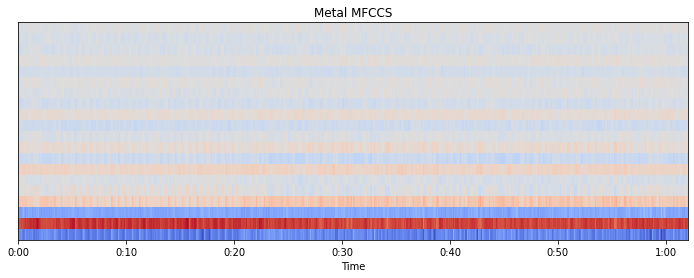

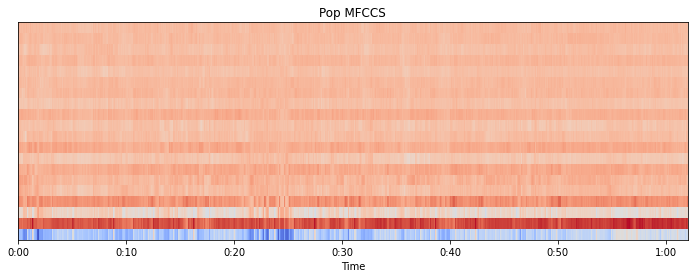

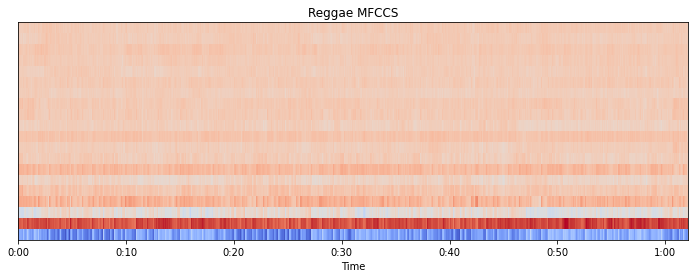

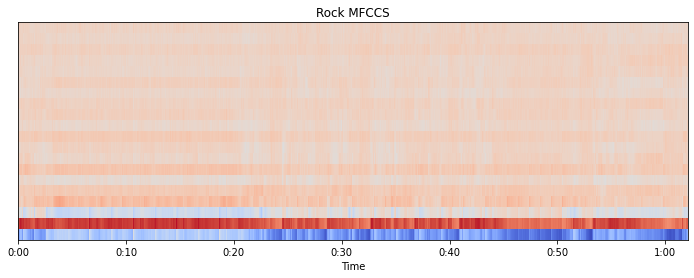

In [98]:
for genre, tracks in songs.items():
    mfccs = librosa.feature.mfcc(tracks)
    print(mfccs.shape)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title(genre + ' MFCCS')
    # mfcc=librosa.feature.mfcc(tracks,sr=sr)
    # plt.figure(figsize=(12,4))
    # Iplt.specshow(mfcc,x_axis="s")
    # plt.title(genre + " Mel-Frequency Cepstral Coefficients")
    # plt.colorbar()

### 3.3 Zero Crossing Rate (ZCR)

The rate at which a signal transitions from positive to zero to negative or from negative to zero to positive is known as the zero-crossing rate (ZCR). Its importance has been recognized in speech recognition and music information retrieval, and it is a fundamental element in the classification of percussive sounds.

Zero crossings Blues: 15
Zero crossings Classical: 13
Zero crossings Country: 3
Zero crossings Disco: 10
Zero crossings Hiphop: 21
Zero crossings Jazz: 13
Zero crossings Metal: 31
Zero crossings Pop: 0
Zero crossings Reggae: 10
Zero crossings Rock: 8


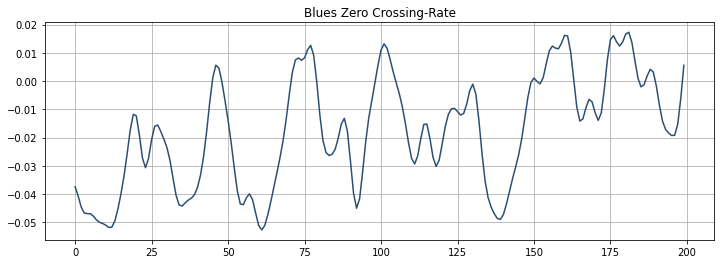

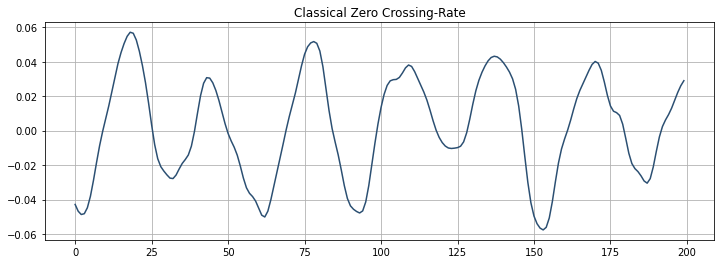

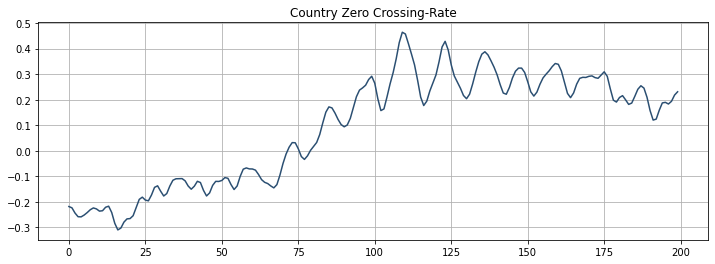

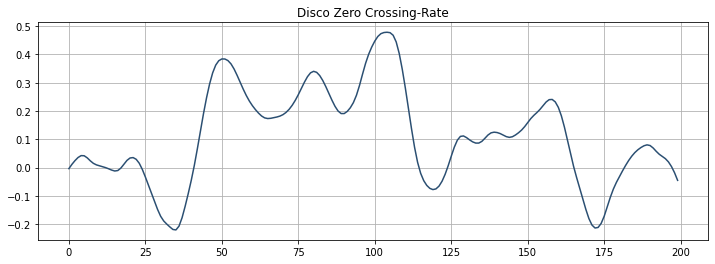

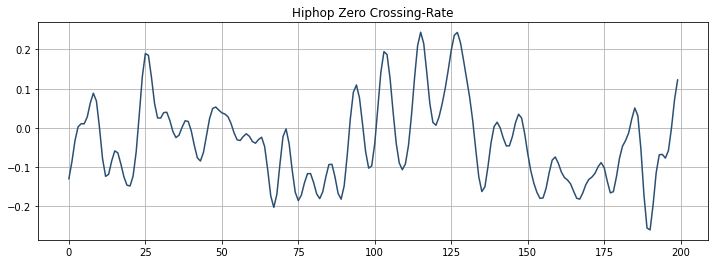

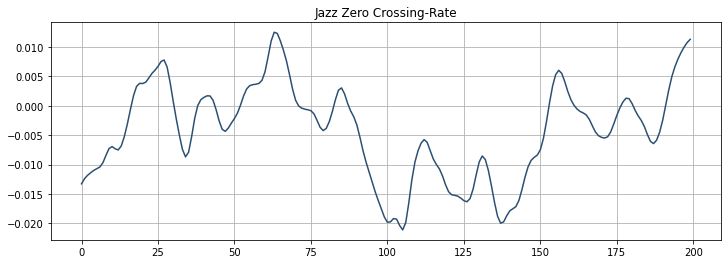

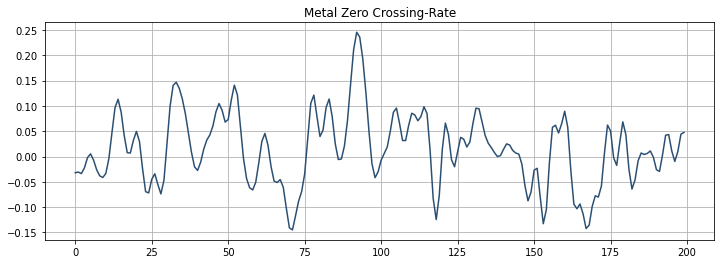

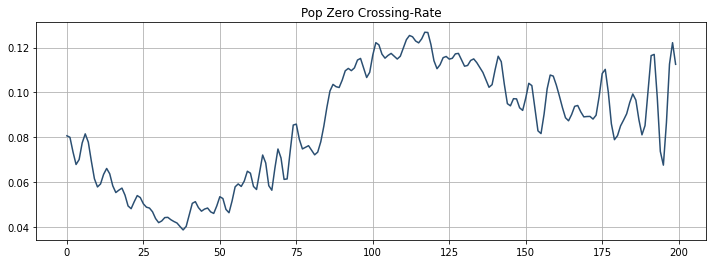

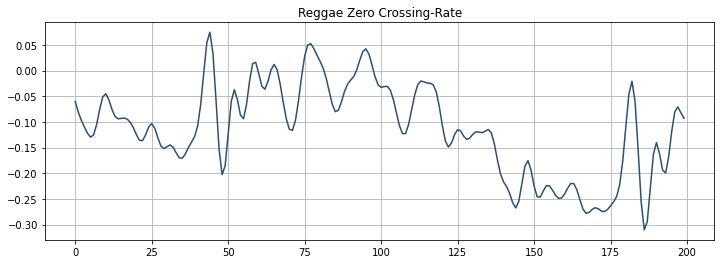

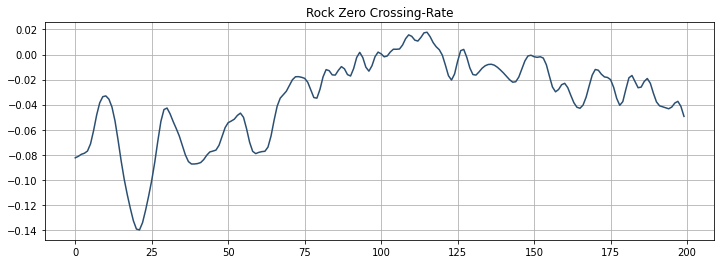

In [99]:
for genre, tracks in songs.items():
    plt.figure(figsize=(12, 4))
    plt.plot(tracks[1000:1200], color='#2B4F72')
    plt.title(genre + ' Zero Crossing-Rate')
    plt.grid()
    zero_crossings = librosa.zero_crossings(tracks[1000:1200], pad=False)
    print('Zero crossings ' + genre + ':', sum(zero_crossings))

### 3.4 Spectral Centroid

The spectral centroid is a metric used to characterize a spectrum in digital signal processing. It shows where the spectrum's center of mass is located. It has a strong perceptual link with the perception of a sound's brightness.

In [100]:
# Normalize function for Spectral rolloff
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\1118276403.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(tracks)[0]
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\1118276403.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(tracks)[0]
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\1118276403.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = libr

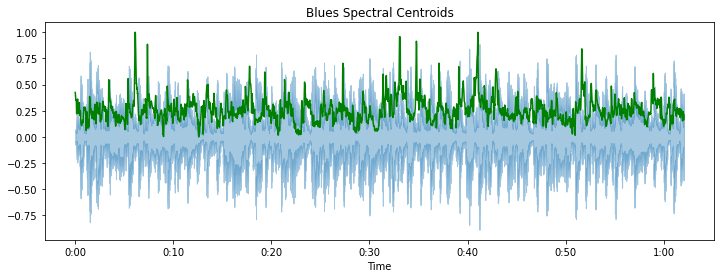

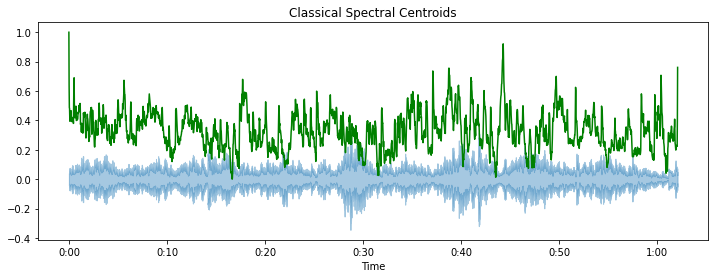

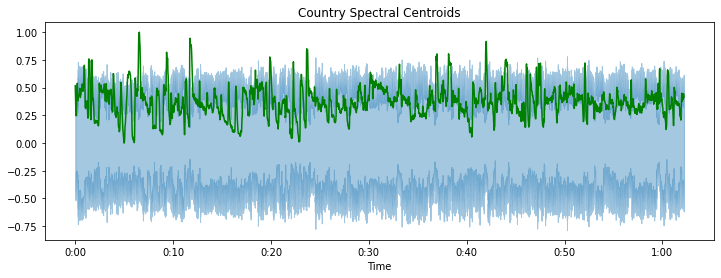

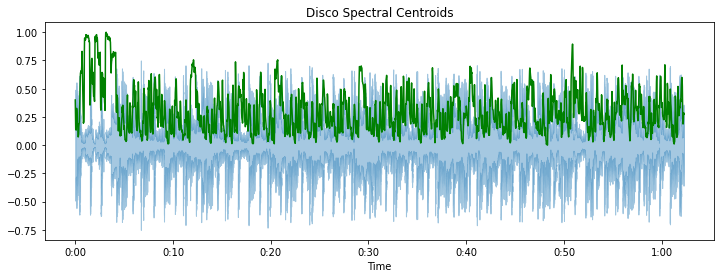

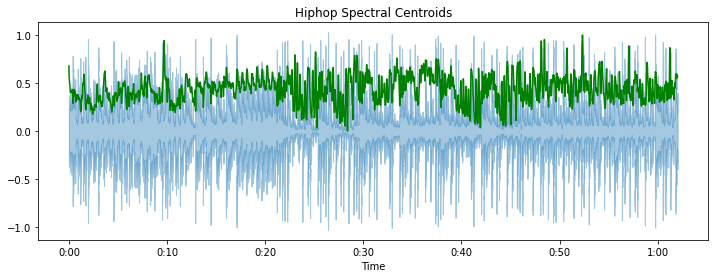

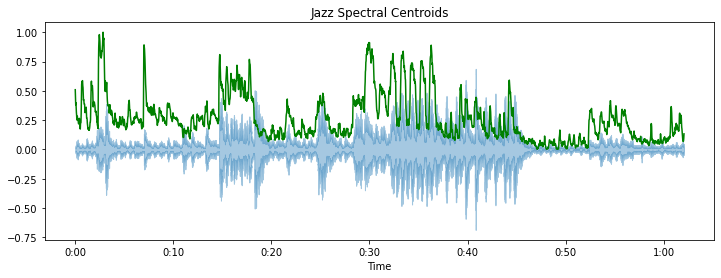

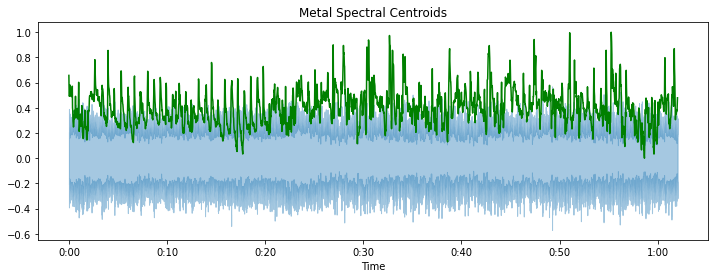

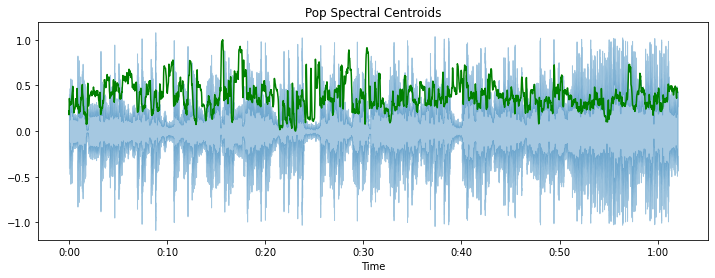

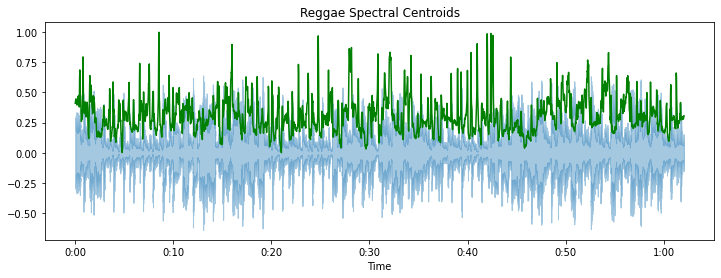

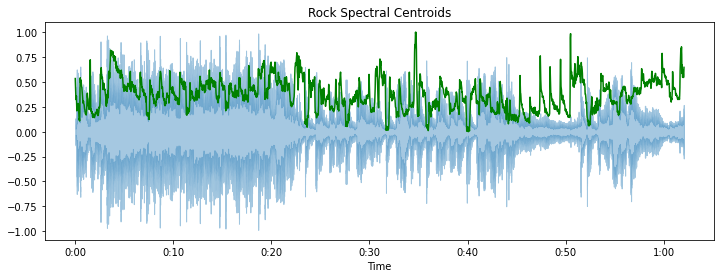

In [101]:
for genre, tracks in songs.items():
    spectral_centroids = librosa.feature.spectral_centroid(tracks)[0]
    t = librosa.frames_to_time(range(len(spectral_centroids)))
    plt.figure(figsize=(12,4))
    lplt.waveshow(tracks, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='green')
    plt.title(genre + ' Spectral Centroids')

## 3.5 Chroma Feature

The fundamental idea behind chroma features is to combine all spectral data related to a specific pitch class into a single coefficient. It is a powerful sound representation in which 12 components reflect the 12 various halftones (chromas) of the musical octave: A, A#, B, C, C#, D, D#, E, F, F#, G, G#.

C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\668819289.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(tracks)
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\668819289.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(tracks)
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\668819289.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(tracks)
C:\Users\Katlego.Rammutlo

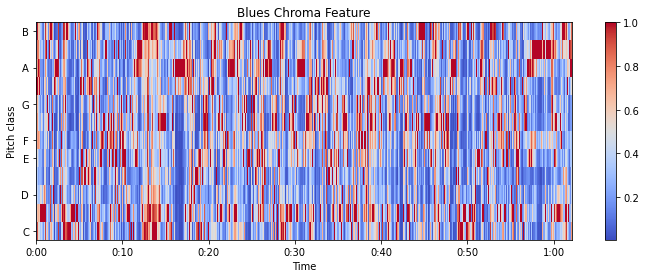

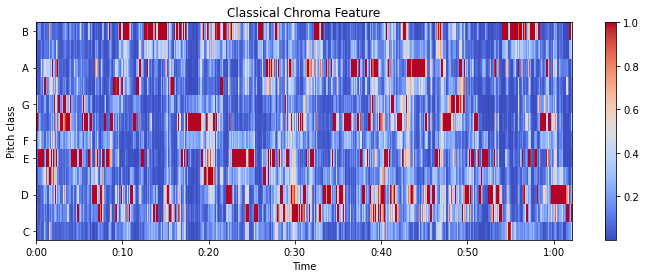

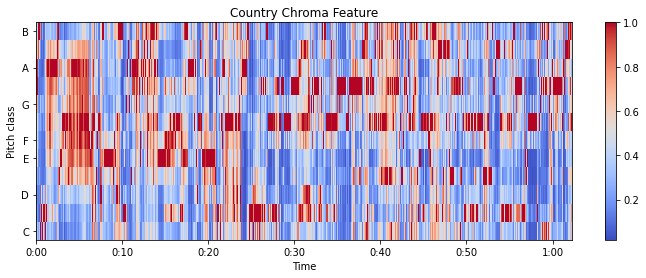

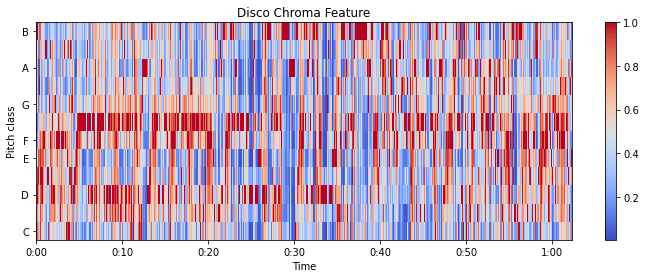

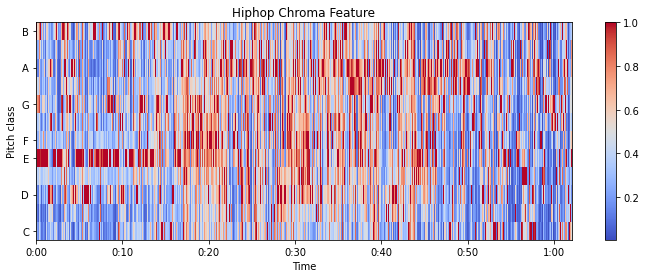

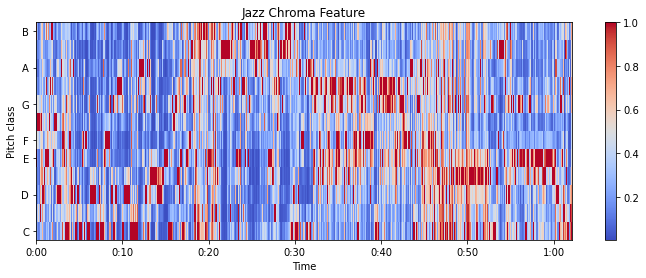

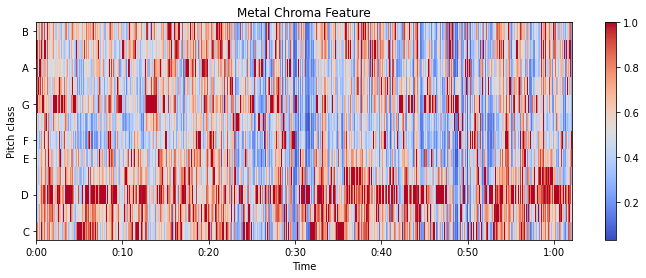

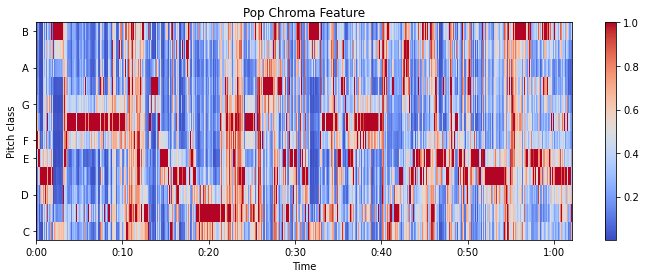

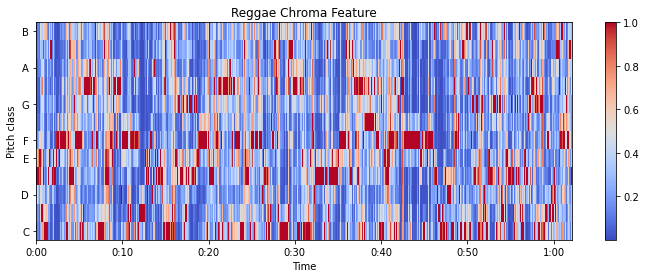

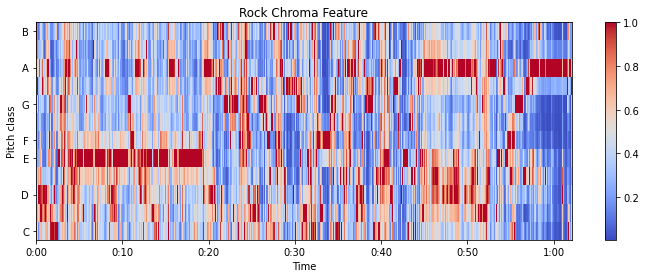

In [102]:
for genre, tracks in songs.items():
    chroma = librosa.feature.chroma_stft(tracks)
    plt.figure(figsize=(12, 4))
    lplt.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title(genre + ' Chroma Feature')

### 3.6 Spectral Centroid

The spectral centroid is a metric used to characterize a spectrum in digital signal processing. It shows where the spectrum's center of mass is located. It has a strong perceptual link with the perception of a sound's brightness.

C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\3960419987.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(track)[0]
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\3960419987.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(track)[0]
C:\Users\Katlego.Rammutloa\AppData\Local\Temp\1\ipykernel_11992\3960419987.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = libros

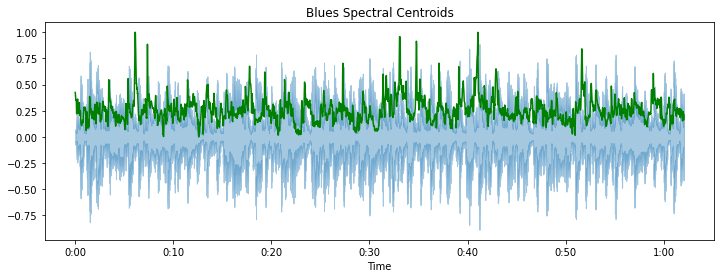

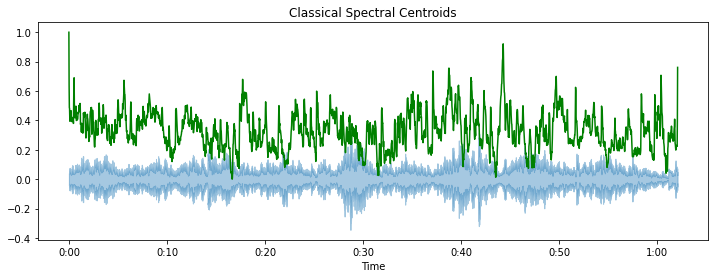

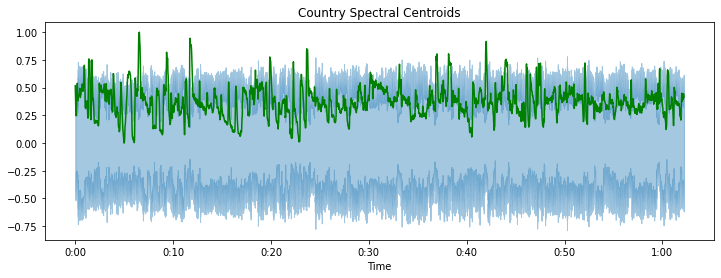

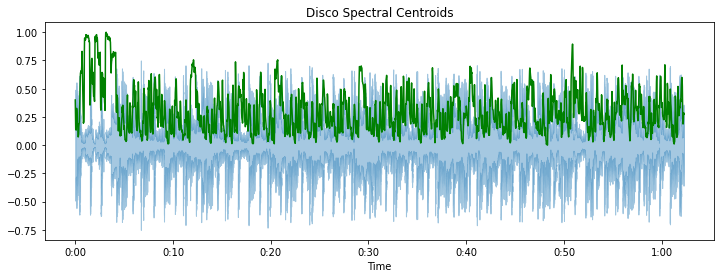

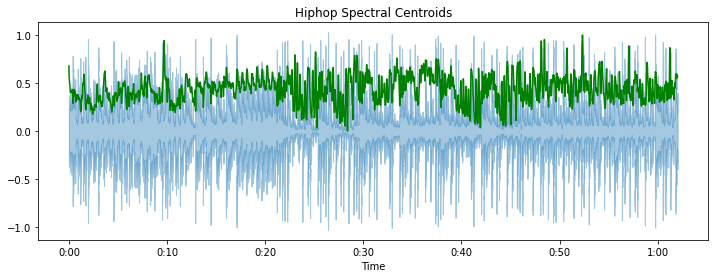

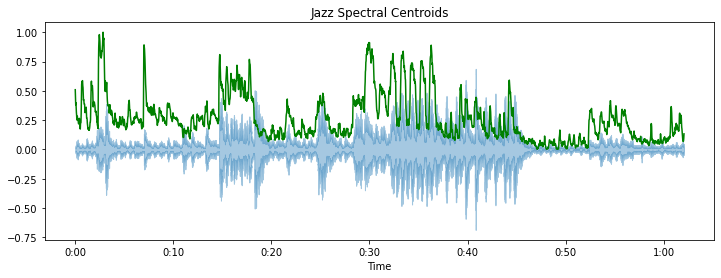

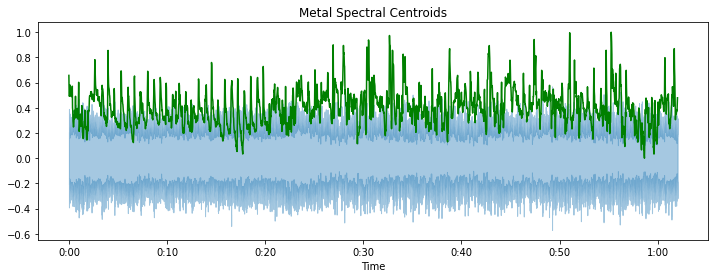

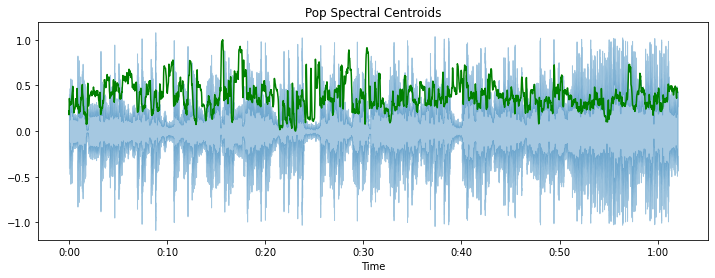

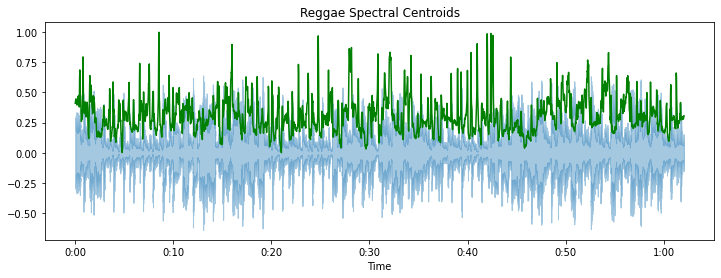

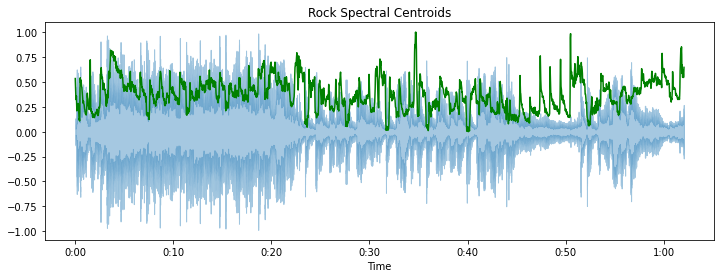

In [103]:
for genre, track in songs.items():
    spectral_centroids = librosa.feature.spectral_centroid(track)[0]
    t = librosa.frames_to_time(range(len(spectral_centroids)))
    plt.figure(figsize=(12,4))
    lplt.waveshow(track, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='green')
    plt.title(genre + ' Spectral Centroids')

### 3.7 Correlation Matrix

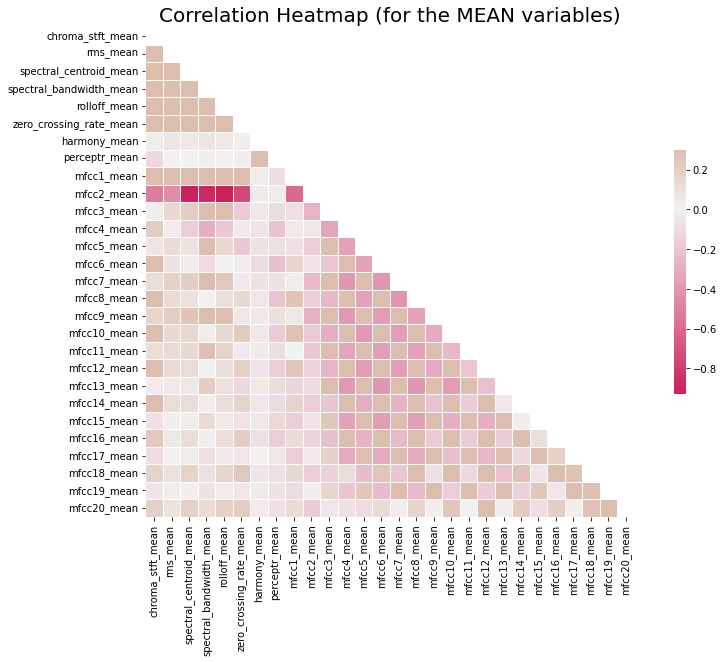

In [104]:
# Computing the Correlation Matrix
mean_variables = [col for col in df.columns if 'mean' in col]
corr = df[mean_variables].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Corr_Heatmap.png")

### 3.8 BPM Boxplot

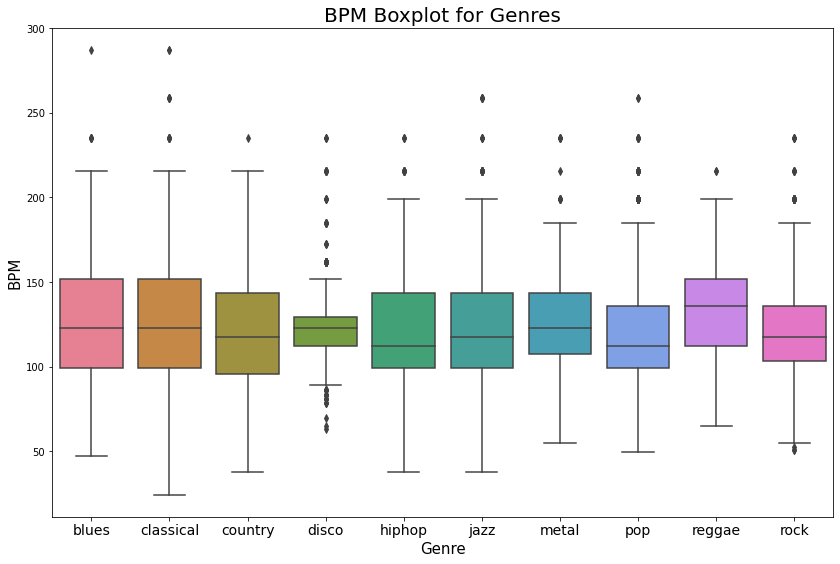

In [105]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(14, 9))
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl')

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

## 4. Data Preprocessing

- Addressing missing values
- Encoding Genre Lables
- Splitting train, validation and test datasets
- Hot One Encoding
- Normalizing data

### 4.1 Missing Vaues

In [106]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


### 4.2 Encoding Genre Label

In [107]:
label_index = dict()
index_label = dict()
for i, genre in enumerate(df.label.unique()):
    label_index[genre] = i
    index_label[i] = genre
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [167]:
df_model = df.copy()
df_model.label = [label_index[l] for l in df_model.label]
df_model.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767      0  
1     5.784063   59.943081      0  
2     2.517375   33.105122      0  
3     3.630866   32.023678      0  
4     0.536961   29.146694      0  

[5 rows x 60 columns]

### 4.3 Splitting Train and Test Sets

Prepararing the dataset

In [168]:
seed = 154
# Shuffling samples
df_model = df_model.sample(frac=1, random_state=seed).reset_index(drop=True)

# Removing columns which are irrelevant
df_model.drop(['filename', 'length'], axis=1, inplace=True)

Splitting in train, validation and test sets

In [169]:
# Split data into 80% train and 20% test
train_dataset, temp_test_dataset = skms.train_test_split(df_model, test_size=0.2)
print(f'Training dataset: {train_dataset.shape} \nTemp. test dataset: {temp_test_dataset.shape}')

Training dataset: (7992, 58) 
Temp. test dataset: (1998, 58)


In [170]:
# Split test dataset into 50% test and 50% validation
test_dataset, val_dataset = skms.train_test_split(temp_test_dataset, test_size=0.5)
print(f'Test dataset: {test_dataset.shape} \nValidation dataset: {val_dataset.shape}')

Test dataset: (999, 58) 
Validation dataset: (999, 58)


### 4.4 OneHot Encoding

In [171]:
train_labels1 = train_dataset.pop('label')
test_labels1 = test_dataset.pop('label')
valid_labels1 = val_dataset.pop('label')

In [172]:
# Encode the labels
train_labels = pd.get_dummies(train_labels1, prefix='label')
valid_labels = pd.get_dummies(valid_labels1, prefix='label')
test_labels = pd.get_dummies(test_labels1, prefix='label')

test_labels

label_0  label_1  label_2  label_3  label_4  label_5  label_6  label_7  \
3424        0        0        0        1        0        0        0        0   
3653        0        0        0        0        0        1        0        0   
9189        0        0        0        0        0        0        0        0   
892         0        0        1        0        0        0        0        0   
9321        0        0        0        0        0        1        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
5225        0        0        0        0        0        0        1        0   
5578        0        0        1        0        0        0        0        0   
9467        0        0        0        0        1        0        0        0   
8336        0        1        0        0        0        0        0        0   
5030        0        0        1        0        0        0        0        0   

      label_8  label_9  
3424        0        0  
3653        0        0  
9189        1        0  
892         0        0  
9321        0        0  
...       ...      ...  
5225        0        0  
5578        0        0  
9467        0        0  
8336        0        0  
5030        0        0  

[999 rows x 10 columns]

### 4.4 Normalizing

In [173]:
# This is to check the dataset's statistics to see whether scaling will be needed
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

count          mean           std           min  \
chroma_stft_mean         7992.0  3.793033e-01  9.063226e-02  1.071078e-01   
chroma_stft_var          7992.0  8.492049e-02  9.645860e-03  1.534475e-02   
rms_mean                 7992.0  1.307851e-01  6.855885e-02  9.534877e-04   
rms_var                  7992.0  2.661665e-03  3.559758e-03  4.379535e-08   
spectral_centroid_mean   7992.0  2.190334e+03  7.519044e+02  4.727416e+02   
spectral_centroid_var    7992.0  4.158344e+05  4.330498e+05  8.118813e+02   
spectral_bandwidth_mean  7992.0  2.234389e+03  5.449919e+02  4.991629e+02   
spectral_bandwidth_var   7992.0  1.187707e+05  1.021021e+05  1.608567e+03   
rolloff_mean             7992.0  4.546358e+03  1.643075e+03  6.583363e+02   
rolloff_var              7992.0  1.629035e+06  1.488787e+06  1.145102e+03   
zero_crossing_rate_mean  7992.0  1.021781e-01  4.550245e-02  1.352539e-02   
zero_crossing_rate_var   7992.0  2.601222e-03  3.592227e-03  5.022605e-06   
harmony_mean             7992.0 -3.613895e-04  1.644570e-03 -2.637822e-02   
harmony_var              7992.0  1.258823e-02  1.261153e-02  9.312309e-23   
perceptr_mean            7992.0 -3.970292e-04  1.112655e-03 -8.793931e-03   
perceptr_var             7992.0  5.569897e-03  6.592784e-03  4.672045e-08   
tempo                    7992.0  1.248804e+02  3.296236e+01  2.437721e+01   
mfcc1_mean               7992.0 -1.459981e+02  1.064371e+02 -6.621716e+02   
mfcc1_var                7992.0  2.826211e+03  2.607626e+03  2.519054e+01   
mfcc2_mean               7992.0  1.014216e+02  3.472421e+01 -1.205339e+01   
mfcc2_var                7992.0  5.916351e+02  4.603129e+02  9.665931e+00   
mfcc3_mean               7992.0 -1.011715e+01  2.397874e+01 -1.042498e+02   
mfcc3_var                7992.0  3.755682e+02  2.956641e+02  2.055229e+00   
mfcc4_mean               7992.0  3.729771e+01  1.784041e+01 -3.513849e+01   
mfcc4_var                7992.0  1.842835e+02  1.338259e+02  3.889467e+00   
mfcc5_mean               7992.0 -2.057613e+00  1.349396e+01 -4.788678e+01   
mfcc5_var                7992.0  1.447221e+02  1.106247e+02  9.754141e+00   
mfcc6_mean               7992.0  1.542254e+01  1.261622e+01 -3.488926e+01   
mfcc6_var                7992.0  1.081427e+02  7.618002e+01  5.267811e+00   
mfcc7_mean               7992.0 -5.837779e+00  1.099673e+01 -4.518702e+01   
mfcc7_var                7992.0  9.884625e+01  6.573552e+01  7.561506e+00   
mfcc8_mean               7992.0  1.072542e+01  1.114743e+01 -4.032347e+01   
mfcc8_var                7992.0  7.525764e+01  4.672068e+01  6.899100e+00   
mfcc9_mean               7992.0 -7.628278e+00  9.343527e+00 -3.945175e+01   
mfcc9_var                7992.0  7.460779e+01  4.514015e+01  8.252314e+00   
mfcc10_mean              7992.0  8.222801e+00  8.823869e+00 -3.283355e+01   
mfcc10_var               7992.0  6.884208e+01  4.204847e+01  7.584913e+00   
mfcc11_mean              7992.0 -6.532098e+00  7.788347e+00 -4.000819e+01   
mfcc11_var               7992.0  6.395400e+01  4.015130e+01  5.385984e+00   
mfcc12_mean              7992.0  4.958030e+00  7.566268e+00 -2.284491e+01   
mfcc12_var               7992.0  5.815115e+01  3.744258e+01  2.557613e+00   
mfcc13_mean              7992.0 -5.169262e+00  7.157489e+00 -2.919122e+01   
mfcc13_var               7992.0  5.719272e+01  3.529378e+01  7.806118e+00   
mfcc14_mean              7992.0  2.168525e+00  6.113566e+00 -2.339009e+01   
mfcc14_var               7992.0  5.412338e+01  3.621529e+01  3.230073e+00   
mfcc15_mean              7992.0 -4.182592e+00  5.909791e+00 -3.046709e+01   
mfcc15_var               7992.0  5.279590e+01  3.637203e+01  1.481917e+00   
mfcc16_mean              7992.0  1.451379e+00  5.742903e+00 -2.554453e+01   
mfcc16_var               7992.0  5.009409e+01  3.393396e+01  1.325786e+00   
mfcc17_mean              7992.0 -4.184468e+00  5.676582e+00 -2.780980e+01   
mfcc17_var               7992.0  5.211427e+01  3.666354e+01  1.624544e+00   
mfcc18_mean           

In [174]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(val_dataset)

normed_train_data.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
4659         -0.982303        -0.351368 -0.838367 -0.690724   
2647         -1.961796         0.672442 -0.243324 -0.292323   
1967         -0.929906        -0.253390 -1.672446 -0.744566   
3753          1.237490        -0.810636 -0.812610 -0.151620   
5567         -0.330219         1.786740  0.329925  0.296547   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
4659                0.589508              -0.228213                 0.764839   
2647               -0.146058              -0.493518                 0.315745   
1967               -1.926486              -0.928650                -2.350748   
3753                1.042681              -0.102809                 0.771619   
5567               -0.675514               0.545244                -0.289756   

      spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
4659               -0.171132      0.541736    -0.081654  ...    -0.812713   
2647                0.010868     -0.301850    -0.062212  ...    -1.162364   
1967               -1.059186     -2.067252    -1.043794  ...    -1.251783   
3753               -0.909991      1.019177    -0.825240  ...    -0.150418   
5567                1.746863     -0.442431     1.356846  ...     0.037838   

      mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
4659    2.811782    -0.065157    1.515040    -1.091476    0.371683   
2647   -0.350948     0.961068   -0.371856     0.545170    1.149426   
1967   -0.699433     1.207759    0.096265     1.019919   -0.439619   
3753   -0.040168    -0.970969   -0.093742     0.182180   -0.673107   
5567    0.949707    -0.913027    0.154111     0.309772   -0.037800   

      mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
4659    -0.340386    1.095013    -1.670554    0.725836  
2647     1.633528    2.169434    -0.731658    0.869744  
1967    -0.519206   -0.868933    -0.365582   -0.083956  
3753    -1.311448   -0.530801    -0.061854    0.151707  
5567    -1.950826    0.376493    -0.730094   -0.050632  

[5 rows x 57 columns]

## 5. Model

### 5.1 Base Model

- The base model here has 2 hidden layers. In one hidden layer a ReLu activation function is used and in the other a Softmax activation function is used to ensure that the output is binary.
- The model will use an efficient stochastic gradient descent algorithm (adam)
- For the lost function, categorical_crossentropy is used for the loss.
- collect and report the classification accuracy

In [192]:
def Base_model():
    model = Sequential()
    model.add(Dense(16, input_shape = (normed_train_data.shape[1],), activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    alpha = 0.001
    optimizer = optimizers.Adam(learning_rate=alpha)
    model.compile(loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

    return model

epochs = 100
batch_size = 16

model = Base_model()
print('Model summary:')
model.summary()

Model summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                928       
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 10)                170       
                                                                 
Total params: 1,370
Trainable params: 1,370
Non-trainable params: 0
_________________________________________________________________


In [193]:
with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=epochs, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )

Epoch 1/100
499/499 [==============================] - 2s 2ms/step - loss: 1.8046 - accuracy: 0.3532 - val_loss: 1.3685 - val_accuracy: 0.5045
Epoch 2/100
499/499 [==============================] - 1s 2ms/step - loss: 1.2055 - accuracy: 0.5639 - val_loss: 1.1006 - val_accuracy: 0.5986
Epoch 3/100
499/499 [==============================] - 1s 1ms/step - loss: 1.0352 - accuracy: 0.6303 - val_loss: 0.9880 - val_accuracy: 0.6456
Epoch 4/100
499/499 [==============================] - 1s 2ms/step - loss: 0.9450 - accuracy: 0.6650 - val_loss: 0.9283 - val_accuracy: 0.6727
Epoch 5/100
499/499 [==============================] - 1s 2ms/step - loss: 0.8842 - accuracy: 0.6913 - val_loss: 0.8824 - val_accuracy: 0.6827
Epoch 6/100
499/499 [==============================] - 1s 1ms/step - loss: 0.8429 - accuracy: 0.7089 - val_loss: 0.8617 - val_accuracy: 0.6957
Epoch 7/100
499/499 [==============================] - 1s 2ms/step - loss: 0.8117 - accuracy: 0.7185 - val_loss: 0.8448 - val_accuracy: 0.7037

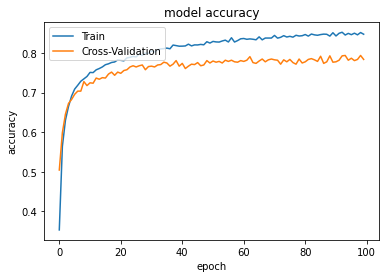

In [194]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

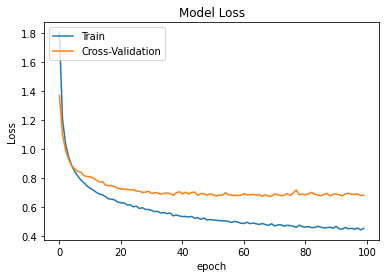

In [195]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [196]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print(f"Accuracy: {round(accuracy,3)} ")

Train Split: 
250/250 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8584
Accuracy: 0.858 


In [197]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print(f"Accuracy: {round(accuracy,3)} ")

Evaluation Split: 
32/32 - 0s - loss: 0.6814 - accuracy: 0.7838 - 57ms/epoch - 2ms/step
Accuracy: 0.784 


In [198]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print(f"Accuracy: {round(accuracy,3)} ")

Test Split: 
32/32 - 0s - loss: 0.6198 - accuracy: 0.7958 - 55ms/epoch - 2ms/step
Accuracy: 0.796 


32/32 [==============================] - 0s 923us/step


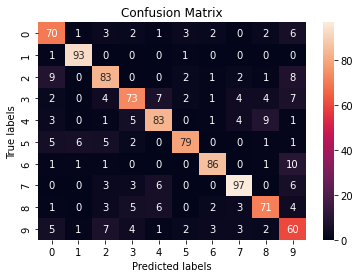

In [199]:
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
predict_results = model.predict(normed_test_data)

# predict_results = (predict_results.argmax())
predict_results= predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


In [200]:
print(index_label)

{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


## Model Improvements